# **ANSCOMBE**

1. Carga y Visualización Inicial del Dataset

Cargamos el dataset, lo leemos con la libreria pandas y presentamos los 5 primeros datos del dataset

In [1]:
import pandas as pd

dataframe= pd.read_csv('/content/df_anscombe.csv')
dataframe.head()

,x,y,group
0,10.0,8.04,1
1,8.0,6.95,1
2,13.0,7.58,1
3,9.0,8.81,1
4,11.0,8.33,1


2. Resumen estadistico

usamos la siguiente linea de codigo para obtener el resumen estadistico del dataset filtrado por grupo y queda de la siguiente manera

In [2]:
dataframe.groupby('group').describe()

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

|Propiedad|Valor|
|:------------|:---------:|
| Media de cada una de las variables x |9.0|
|Varianza de cada una de las variables x|11.0|
|Media de cada una de las variables y|7.5|
|Varianza de cada una de las variables y|4.12|
|Correlación entre cada una de las variables x e y|0.816|
|Recta de regresión|y = 3 + 0.5x|

3. Graficos de cada grupo


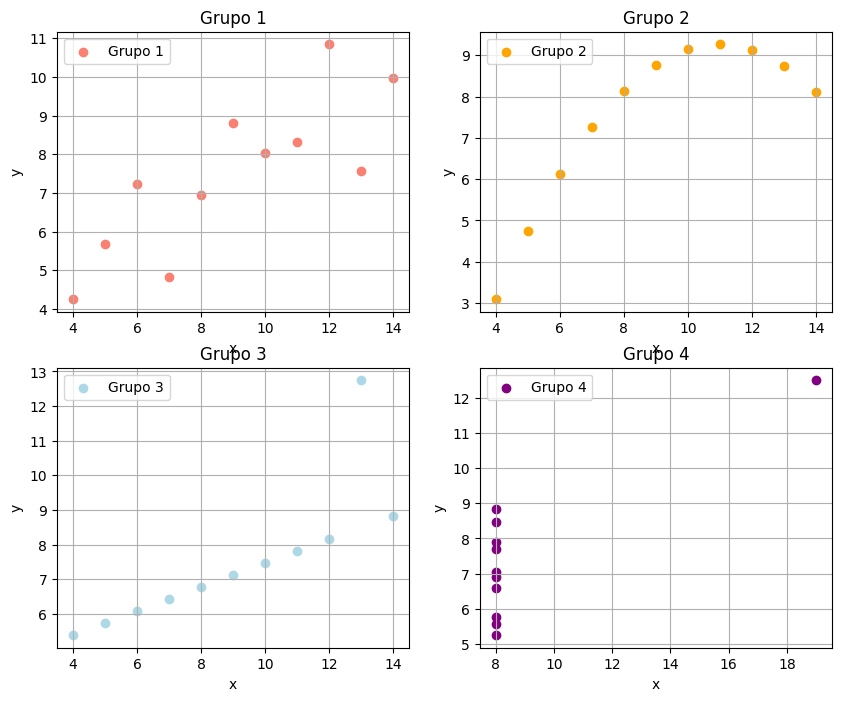

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos en diferentes grupos
group1 = dataframe[dataframe['group'] == 1]
group2 = dataframe[dataframe['group'] == 2]
group3 = dataframe[dataframe['group'] == 3]
group4 = dataframe[dataframe['group'] == 4]

listaGrupos = [group1, group2, group3, group4]
colores = ['salmon', 'orange', 'lightblue', 'purple']

# Crear la figura y subgráficas (2x2)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Aplanar el arreglo de ejes para iterar más fácilmente
axs = axs.flatten()

# Iterar sobre los grupos y ejes
for i, (grupo, ax) in enumerate(zip(listaGrupos, axs)):
    ax.scatter(grupo['x'], grupo['y'], label=f'Grupo {i + 1}',color=colores[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Grupo {i + 1}')
    ax.grid(True)
    ax.legend()

# Mostrar la figura completa
plt.show()

Aunque estos conjuntos de datos comparten los mismos valores estadísticos, sus distribuciones visuales son notablemente diferentes. Esto subraya la importancia de no limitarse a las estadísticas descriptivas para el análisis de datos, sino también de visualizar las relaciones entre las variables.

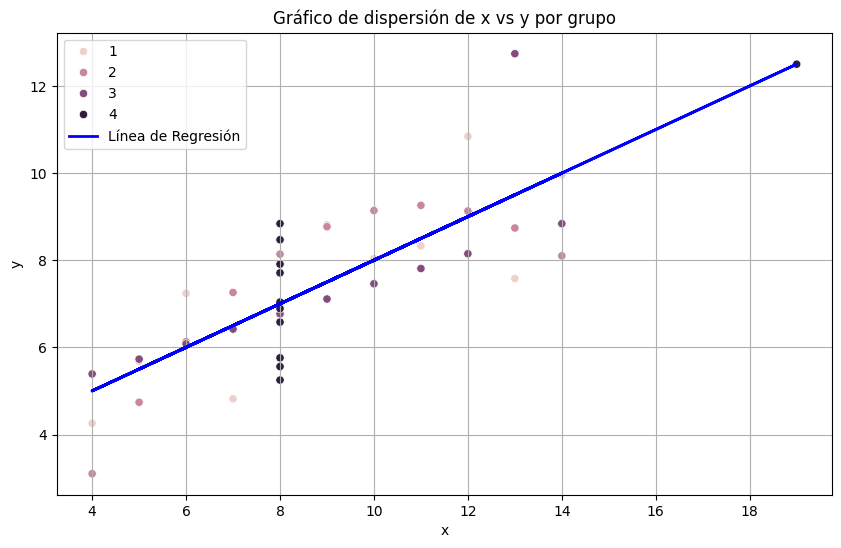

In [28]:
from sklearn.linear_model import LinearRegression

# Creamos la grafica
plt.figure(figsize=(10, 6))
# Graficamos
sns.scatterplot(x='x', y='y', hue='group', data=dataframe)
plt.title('Gráfico de dispersión de x vs y por grupo')
# Calcular la regresión lineal usando todos los puntos de los grupos
X = dataframe['x'].values.reshape(-1, 1)  # Variable independiente
Y = dataframe['y'].values  # Variable dependiente

# Crear el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X, Y)

# Predicciones del modelo
y_pred = regression_model.predict(X)

# Dibujar la línea de regresión en la gráfica
plt.plot(dataframe['x'], y_pred, color='blue', linewidth=2, label='Línea de Regresión')

# Configurar el gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

4. Diagrama de Cajas y Bigotes por Grupo

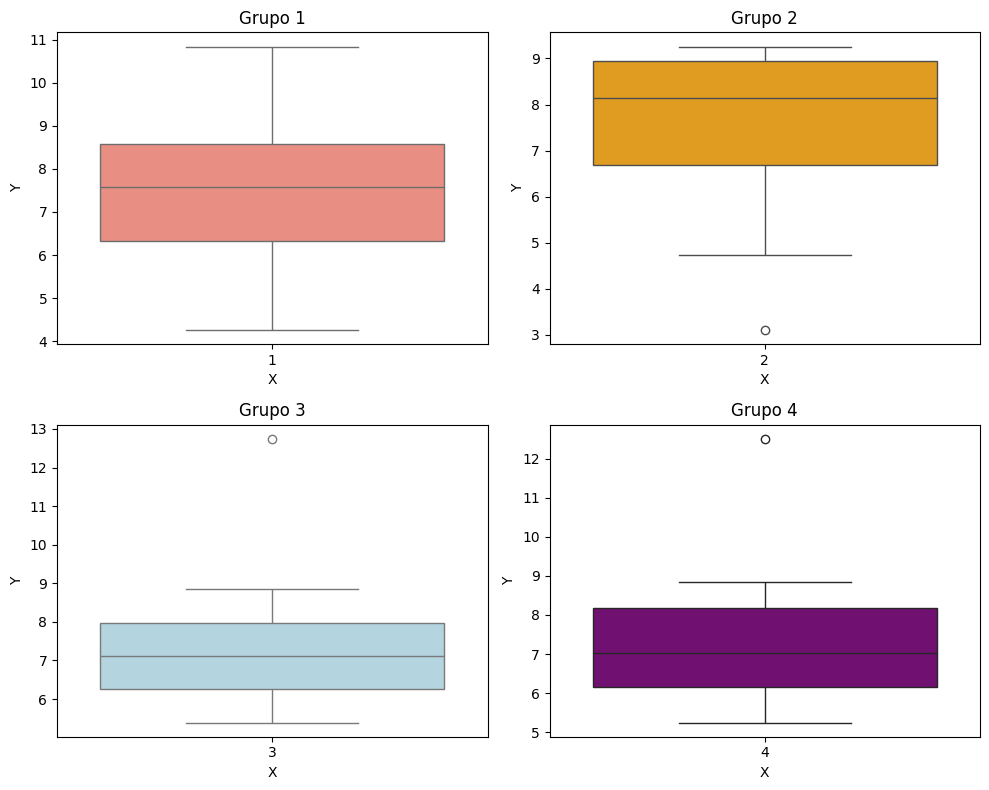

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y las subgraficas (2x2)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Lista de grupos de datos y colores para los gráficos
grupos = [group1, group2, group3, group4]
colores = ['salmon', 'orange', 'lightblue', 'purple']

# Aplanar el arreglo de ejes para facilitar la iteración
axs = axs.flatten()

# Iterar sobre cada grupo y eje
for i, (grupo, ax) in enumerate(zip(grupos, axs)):
    sns.boxplot(x='group', y='y', data=grupo, color=colores[i], ax=ax)
    ax.set_title(f'Grupo {i + 1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()

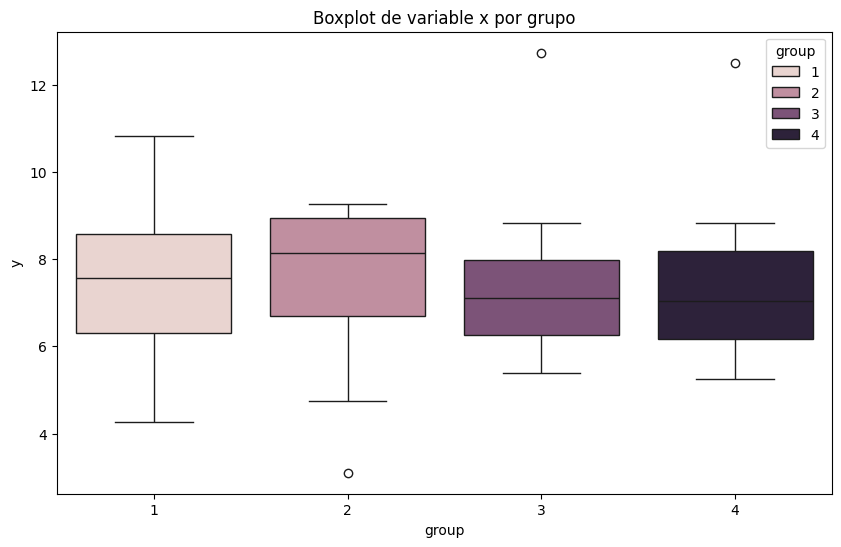

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Creamos a=la figura
plt.figure(figsize=(10, 6))
#Graficamos
sns.boxplot(x='group', y='y', hue='group', data=dataframe)
plt.title('Boxplot de variable x por grupo')
plt.show()

# **Conclusión**

El cuarteto de Anscombe ilustra claramente la importancia de visualizar los datos. Aunque valores estadísticos como la media, la varianza y la correlación pueden ser iguales, no reflejan completamente cómo se distribuyen los datos.

Al realizar un análisis de datos o trabajar con estadísticas, es fundamental complementar los cálculos numéricos con la visualización de los datos. Esto ayuda a evitar conclusiones incorrectas que podrían surgir si se confía solo en los números.